# Intercomparison between CMIP6 models and ERA5 reanalysis of cloud phase and snowfall
<br>
<font size=4>
    <p><b> Franziska Hellmuth</b></p>
    <p><i> Fundamentals of Ocean/Atmosphere Data Analysis</i></p>
    </font>

In this course I want to begin on my work to find the global relation between cloud phase and snowfall. I'll start with CMIP6 data since I don't have all the ERA5 reanalysis yet.
Variables which will be useful:
- specific cloud liquid water content
- specific cloud ice water content
- temperature
- surface snowfall

## Necessary packages
- jupyter
- jupyterlab
- dask
- numpy
- xarray
- matplotlib
- seaborn
- cartopy
- glob
- scipy
- pyngl

# Day 2 - Homework
All homework should be done in a Live Script, as discussed in thisafternoon's lab.Preparing your data:
1. Remove any obvious bad values.
2. If your dataset is not regularly spaced, interpolate it to be so.
3. If your dataset has missing data attend to these through simplelinear interpolation; try the jLab routine fillbad.

Preparing your data:
1. Please review the notes.
2. Look at your data using the above idea.
3. Note as many observable features as you can.
4. Comment these in your Live Script.

Also do the homework at the end of the Data Analysis Startup Lab.
If you don't have a mooring dataset you can use {this one}.

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
from imports import (xr, fct, plt, ccrs, np, glob, stats, Ngl, mpl)

# reload imports
%load_ext autoreload
%autoreload 2

# plotting cosmetics
fct.plot_style()

In [2]:
### Define data location for AERONET Sunphotometer, MERRA2 and CMIP6 
cmip_path   = '/home/franzihe/nird_franzihe/NorESM2-LM/r1i1p1f1/'

# CMIP6
I will first start with NorESM2 simulations and load a 30 year period from 1985 - 2014.

In [3]:
fn = dict()
fn['clw'] = fct.read_CMIP(cmip_path, 'clw')   # Mass fraction of Cloud Liquid Water (kg kg-1)
fn['cli'] = fct.read_CMIP(cmip_path, 'cli')   # Mass fraction of Cloud Ice (kg kg-1)
fn['pr']  = fct.read_CMIP(cmip_path, 'pr')     # Precipitation (kg m-2 s-1)
fn['ta']  = fct.read_CMIP(cmip_path, 'ta')     # Air Temperature (K)

Let's check how the dataset looks like.

In [4]:
print('Coordinates:', fn['clw'].coords)

Coordinates: Coordinates:
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 ... 2014-12-16T12:00:00


I see from the coordinate 'time', that it is only in the middle of the month. This means my data must have monthly averages. 

In [5]:
print('Variables:',  fn['clw'].var)

Variables: <bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lev: 32, lon: 144, time: 420)
Coordinates:
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(10, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(120, 32, 2), meta=np.ndarray>
    p0         (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    a          (time, lev) float64 dask.array<chunksize=(120, 32), meta=np.ndarray>
    b          (time, lev) float64 dask.array<chunksize=(120, 32), meta=np.ndarray>
    ps         (time, lat, lo

## Cloud water content
Show attributes! Keep track of what is in my dataset (especially 'units' and 'standard_name'/'long_name').

In [6]:
fn['clw'].clw.attrs

OrderedDict([('standard_name', 'mass_fraction_of_cloud_liquid_water_in_air'),
             ('long_name', 'Mass Fraction of Cloud Liquid Water'),
             ('comment',
              'Includes both large-scale and convective cloud. Calculate as the mass of cloud liquid water in the grid cell divided by the mass of air (including the water in all phases) in the grid cells. Precipitating hydrometeors are included ONLY if the precipitating hydrometeors affect the calculation of radiative transfer in model.'),
             ('units', 'kg kg-1'),
             ('original_name', 'CLDLIQ'),
             ('original_units', '1'),
             ('cell_methods', 'area: time: mean'),
             ('cell_measures', 'area: areacella')])

Let's plot clw at time step 0 in the middle of the atmosphere (lev = 0.5 -> 32/2)

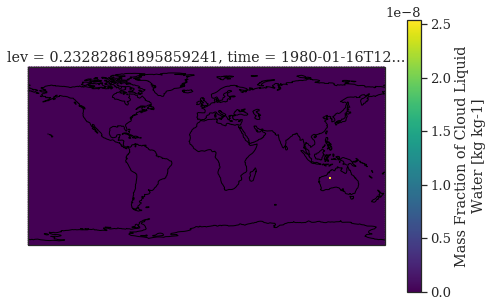

In [7]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw.isel(time = 0, lev = 16).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
ax.coastlines();

I see the mass fraction of CLW is small (10$^{-8}$ kg kg$^{-1}$). Only one dot over Australia in the middle atmosphere for January 1980. 

Let's have a look how the CLW mean looks for the year 1990.

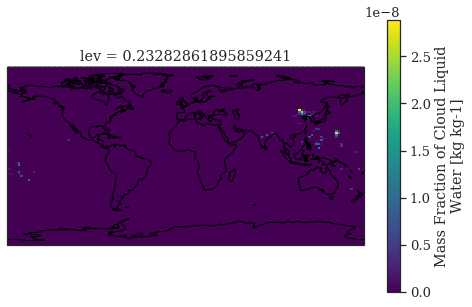

In [8]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw.sel(time = slice('1990-01', '1990-12')).isel(lev = 16).mean(['time'], keep_attrs = True).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
ax.coastlines();


The appearance of CLW increased. I see more dots in the Southern Pacific and some more over China and India for the middle of the atmosphere. It might be useful to sum up the CLW over the column and see if I get more CLW, since it is still 10$^{-8}$ kg kg$^{-1}$.

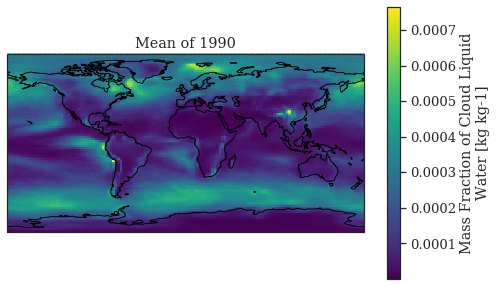

In [9]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw.sel(time = slice('1990-01', '1990-12')).sum('lev',keep_attrs =  True).mean(['time'], keep_attrs = True).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
ax.coastlines()
ax.set_title('Mean of 1990');

There is obious higher values of CLW over China, Chile, Labrador See and around Svalbard in 1990. Lower values of CLW show in the tropics. High CLW values in China related to higher Aerosol content? High CLW because of the Andes?
In 1991 Mt. Pinatubo errupted. I wonder how the CLW looks for 1991 and 1992.

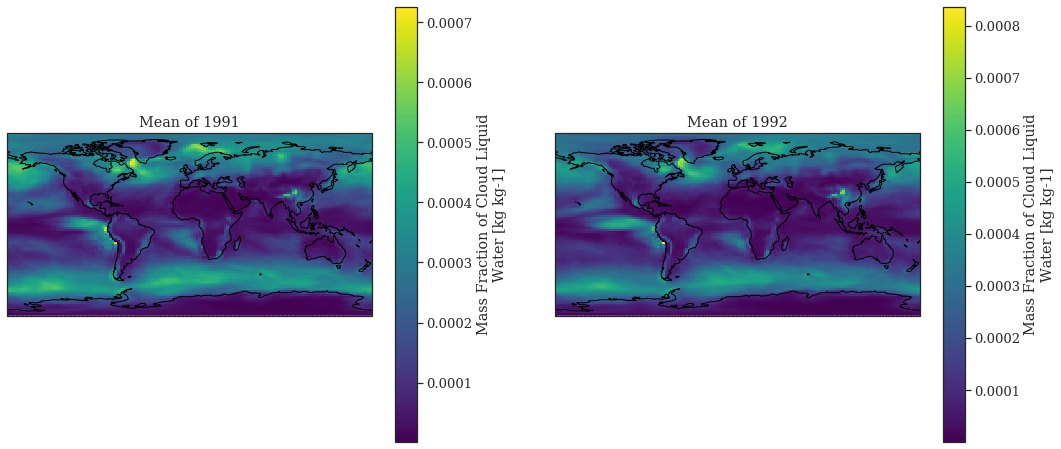

In [10]:
fig, axs = fct.sp_map(1,2, figsize=[18,8], sharex=True, sharey=True)

for yy, ax in zip(np.arange(1991,1993), axs.flatten()):
    im = fn['clw'].clw.sel(time = slice(str(yy)+'-01', str(yy)+'-12')).sum('lev',keep_attrs =  True).mean(['time'], keep_attrs = True).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
    ax.coastlines()
    ax.set_title('Mean of %s' %yy)
    
plt.tight_layout()

Besides the different colorbar dimension one can not see a difference to 1990. The same areas have still high CLW. But I'm looking at model simulations, so that a model represents exactly a certain year is not very likely. One could say that the CLW is higher in 1992 (comparing the colorbar).

Let's have a look on the decade.

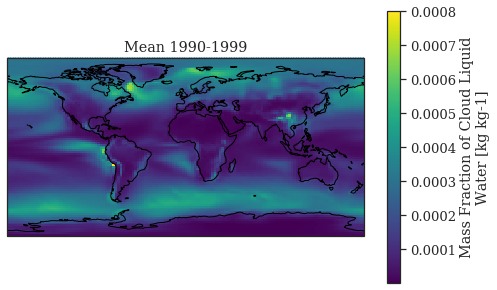

In [11]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw.sel(time = slice('1990-01', '1999-12')).sum('lev',keep_attrs =  True).mean(['time'], keep_attrs = True).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
ax.coastlines()
ax.set_title('Mean 1990-1999' );

And now 30 years:

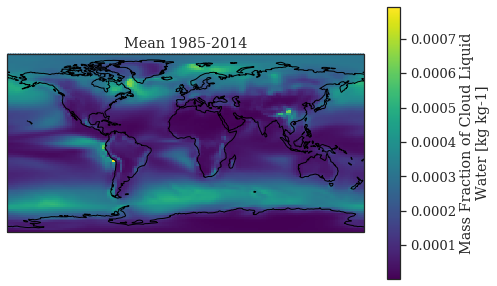

In [12]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw.sel(time = slice('1985-01', '2014-12')).sum('lev',keep_attrs =  True).mean(['time'], keep_attrs = True).plot.pcolormesh(ax = ax, 
                                                transform = ccrs.PlateCarree(),
                                                )
ax.coastlines()
ax.set_title('Mean 1985-2014' );

- high values of CLW over China, the Labrador See, around Svalbard and at the Andes
- CLW associated with the Antarctic Circumpolar Current
- CLW in mountainous regions 
- not too much CLW in ITCZ

# Day2 - In Class Assignments 
1. Compute and plot the histogram of your data. You can do thisusing Matlab's hist or histogram functions. (For bivariatedata, do this and the next step separately for both components.)
2. Compute the sample mean, variance, skewness, and kurtosisusing Matlab's mean and std functions. While you may have askewness or kurtosis function, it's very easy to code theseyourself in terms of the mean and variance, so please do that.
3. Repeat 1&2 for a realization of Gaussian white noise usingrandn that is set to have the same variance as your data. Inwhat ways, if any, is your data non-Gaussian?
4. Experiment with filtering your data and vfilt. Plot the data,the filtered version, and the residual (original minus filtered) fora few choices of filter length. What choice seems most suitablefor your data and why? Note if your data doesn't have noise ormultiple scales of varability, try working with {this one}.
5. Re-do the steps 1&2 involving the time-domain statistics, butusing firstly the smoothed, and secondly the residual, versionsof your data. How do the statistics change dependent upon thelowpass or highpass filtering? How do you interpret this?

In [13]:
starty = '1985'; endy = '2014'

In [14]:
_clw = fn['clw'].clw.sel(time = slice(starty + '-01', endy + '-12')).sum('lev', keep_attrs= True)

In [15]:
_clw = _clw.where(_clw != 0)              # ignore all values = 0.
_clw = _clw.dropna('time', how = 'all')   # ignore nan
_clw.to_dataframe().describe()

,clw
count,4.976631e+06
mean,1.839462e-04
std,1.769502e-04
min,1.325316e-37
25%,3.727603e-05
50%,1.286927e-04
75%,2.895012e-04
max,2.818243e-03


### Compute and plot the histogram of your data.

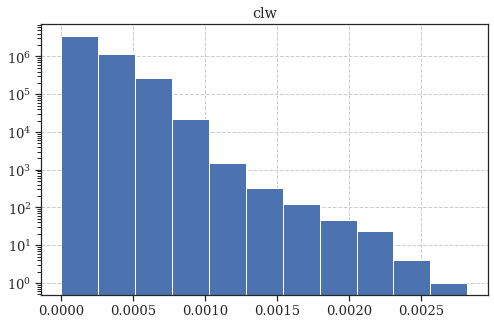

In [16]:
f, ax = plt.subplots(1,1, figsize=[8,5], )

_clw.to_dataframe().hist(ax = ax, bins=11)
ax.set_yscale('log')                      

There are many values around zero so I decided for a log scale. This histogram shows the distribution of _CLW_ in 30 years for each model grid point. For cloud water, cloud ice and precipitation the distributions usually look like this, many values around zero and not so many values at higher values. The occurance of high _CLW_ is less likely than low values.

### Mean, Variance, Skewness, Kurtosis
Compute the sample mean, variance, skewness, and kurtosis using Matlab's mean and std functions. 
I chose to compute those values along the _time_ axis.

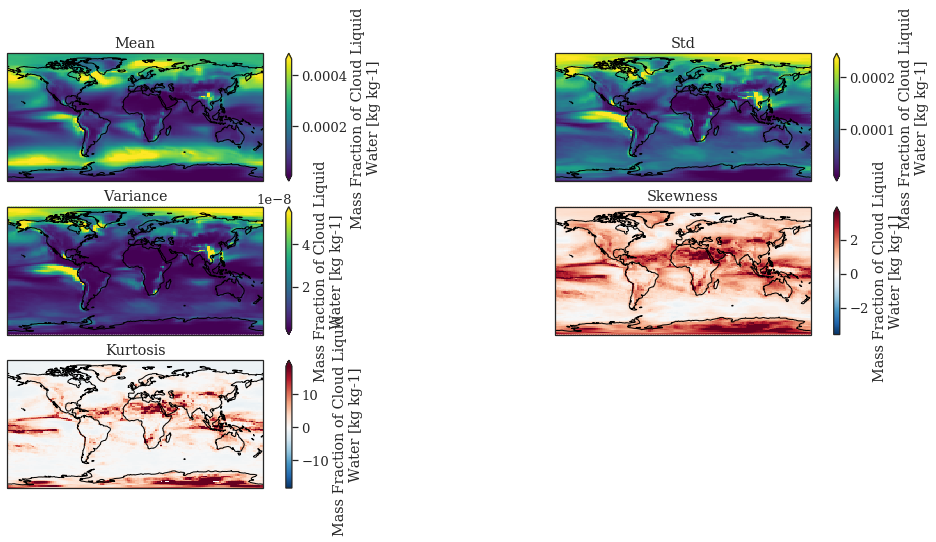

In [17]:
fct.plt_mean_std_var_skew_kurt(_clw)

From the mean plot we see that most of the _CLW_ occurs in the Southern Ocean, over China, west of the Andes and some spots in the Arctic such as Labrador Sea and around Svalbard. We need to check if that is true. For this I would compare it to some reanalysis data such as ERA5.
The standard deviation gives me information about the variation in my data set. We see that most of the variation occurs all over the Arctic and west of the Andes and China. The same is true for the variance. 
The data set is positvely skewed over the Antarctic and the ITCZ. In the 'tails' indicate the occurance of extreme _CLW_ in this regions. The same is seen in the kurtosis.

Plot the seasonal statistics for _CLW_.

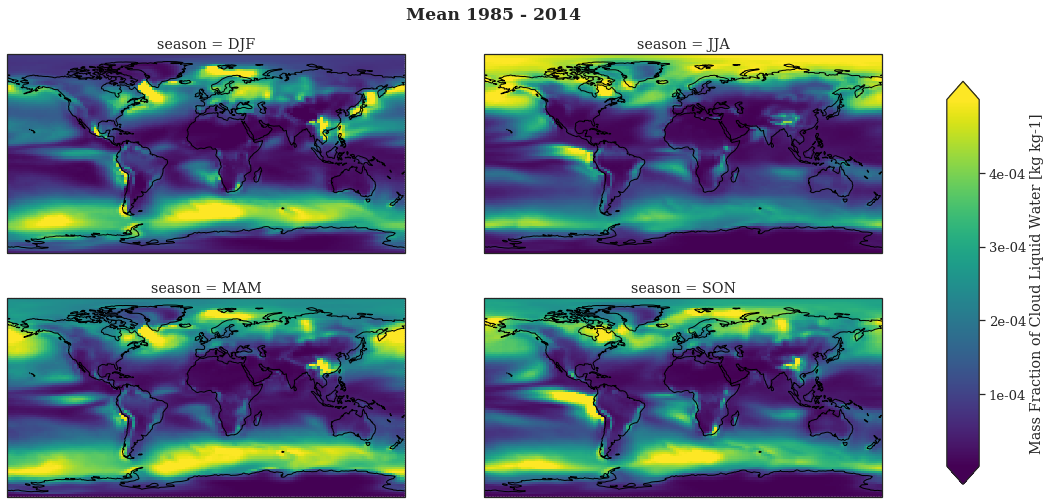

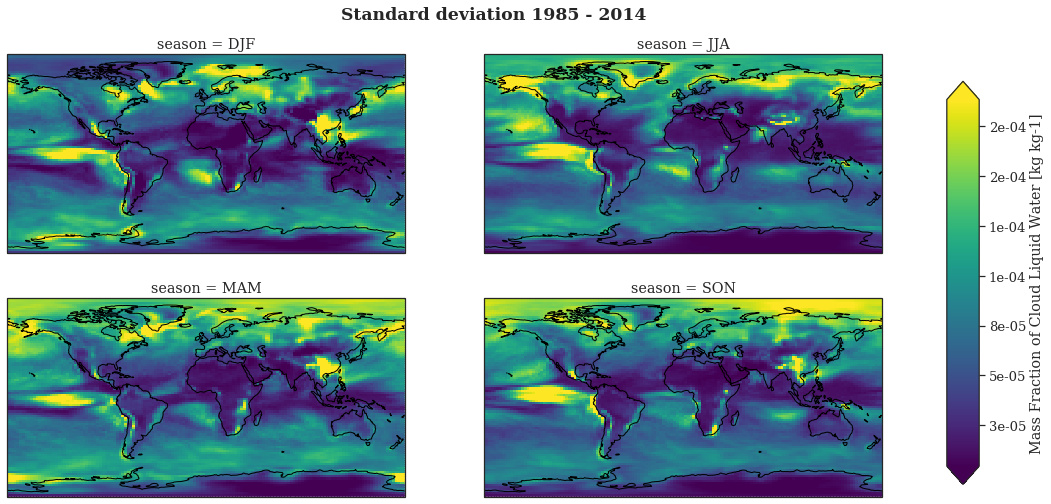

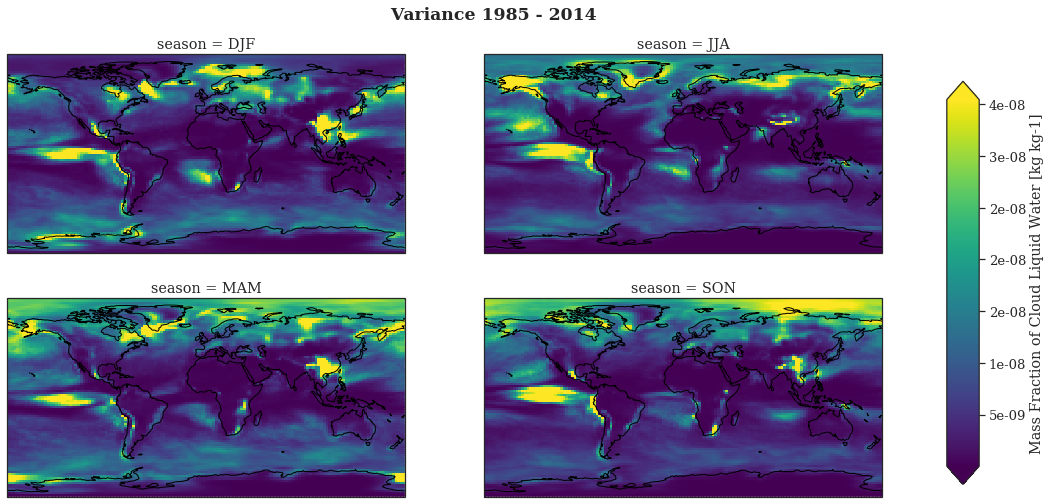

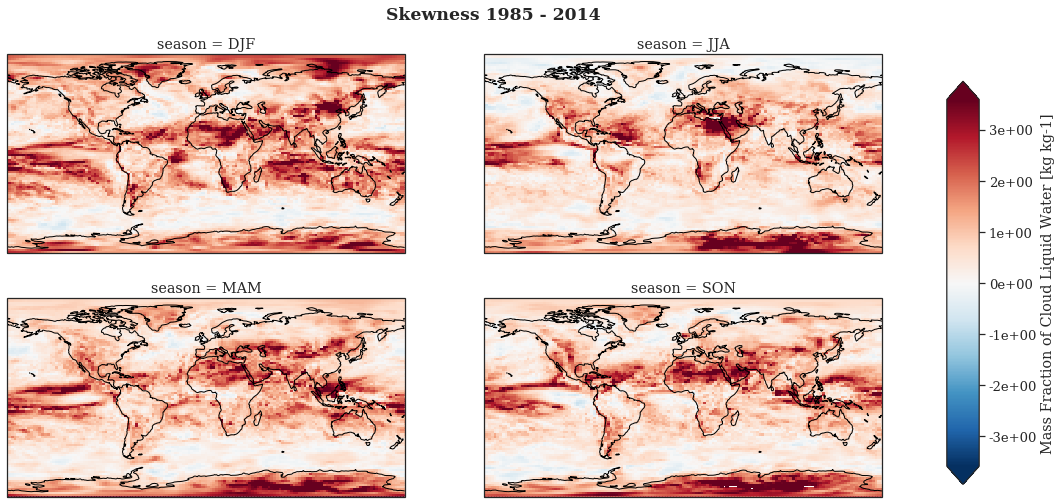

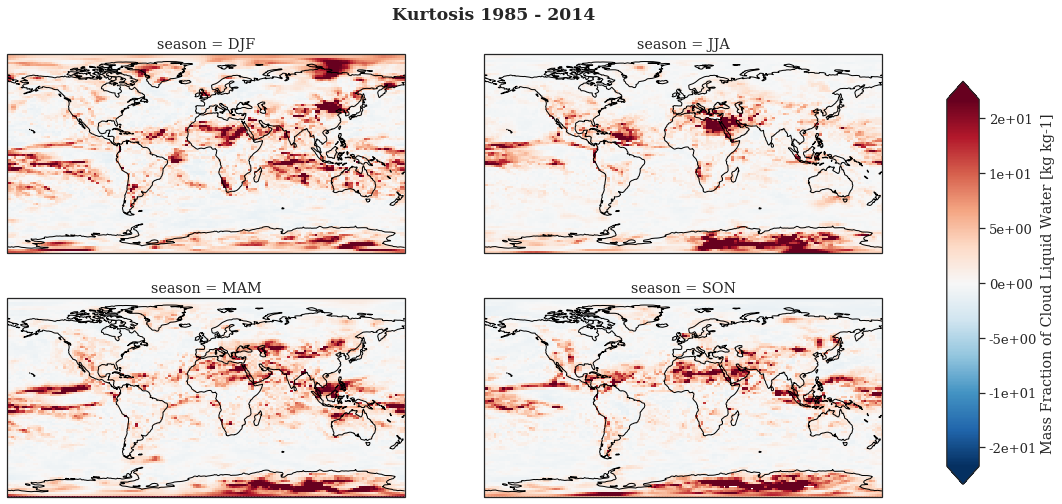

In [18]:
stat = ['mean', 'std', 'var', 'skew', 'kur']


for _st in stat:
    fct.plt_stat_season(_clw, _st, starty, endy)


### Gaussian white noise
Generate a random distribution with a specific mean and variance $\sigma^2$. Multiply the output of _np.random.randn_ by the standard deviation $\sigma$, and then add the desired mean. 

In [19]:
#_G = fn.clw.mean('lev', keep_attrs = True) + fn.clw.var('lev', keep_attrs = True)**2 *np.random.randn(fn.time.shape[0],fn.lat.shape[0],fn.lon.shape[0])


Use the numpy.random.normal() method to get a Normal Data Distribution. It has three parameters:
- loc - (Mean) where the peak of the bell exists.
- scale - (Standard Deviation) how flat the graph distribution should be.
- size - The shape of the returned array.

In [20]:
_clw_G = np.random.normal(fn['clw'].clw.mean('lev', keep_attrs = True), fn['clw'].clw.std('lev', keep_attrs = True))
fn['clw']['clw_G'] = (['time','lat', 'lon',], _clw_G)   # assign new value to xarray - easier for plotting

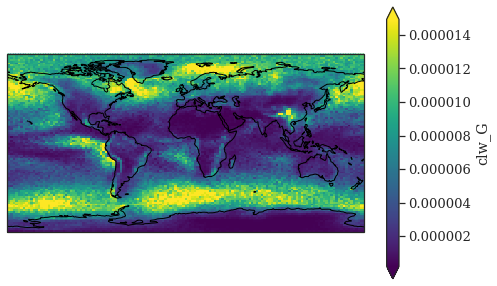

In [21]:
f, ax = fct.sp_map(1, figsize = [8,5])
fn['clw'].clw_G.sel(time = slice(starty + '-01', endy + '-12')).mean('time', keep_attrs = True).plot(ax = ax,
                                        transform=ccrs.PlateCarree(), 
                                         robust=True)
ax.coastlines();

The mean of the assigned Gaussian distribution should and is the same as for my data set. I see the same patterns as above. High _CLW_ values over the Southern Ocean, west of Andes, over China, Labrador Sea and around Svalbard.

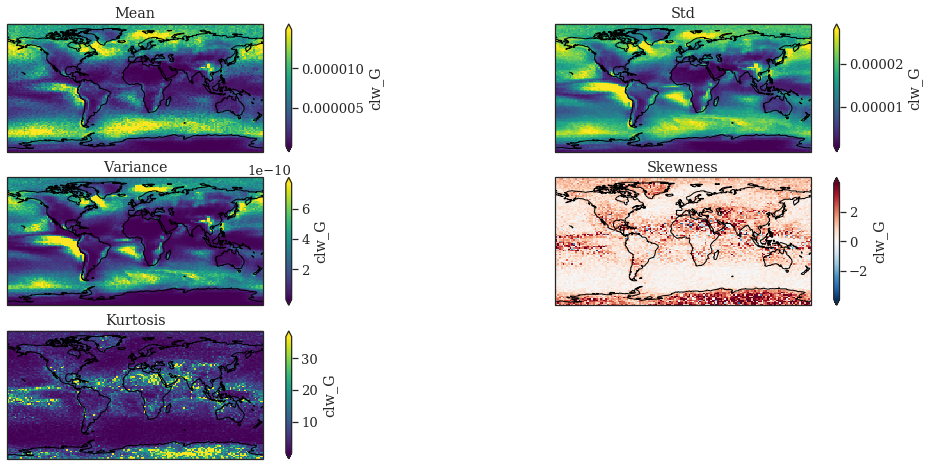

In [22]:
fct.plt_mean_std_var_skew_kurt(fn['clw'].clw_G)

In what ways, if any, is your data non-Gaussian?
My data has a large positive variability (std, variance) in the Arctic. The Gaussian distribution has less.
The kurtosis in my data shows large deviation from the mean in the Antarctic and over the Sahara. The Gaussian shows similiar patterns, but it is only positiv values. 
My data shows skewness in the Sahra and the Antarctic. The Gaussian distribution shows that only in the Antarctic in the positive tail.

# My week project
Is there a relation between cloud water/ice to precipitation depending on the season? How does the relation look for certain atmospheric temperature?

In [23]:
starty = '1985'; endy = '1990'  # Define time to test analysis

_cloud = (fn['clw'].clw.sel(
    time = slice(starty+'-01', endy+'-12')) + fn['cli'].cli.sel(
    time = slice(starty+'-01', endy+'-12'))).sum('lev', keep_attrs = True)
_cloud = _cloud.where(_cloud != 0.)
_cloud = _cloud.dropna('time', how = 'all')


_precip = fn['pr'].pr.sel(time = slice(starty+'-01', endy+'-12'))
_precip = _precip.where(_precip != 0.)
_precip = _precip.dropna('time', how = 'all')


I _slice_ the data to Scandinavia to make the plotting a faster routine. 

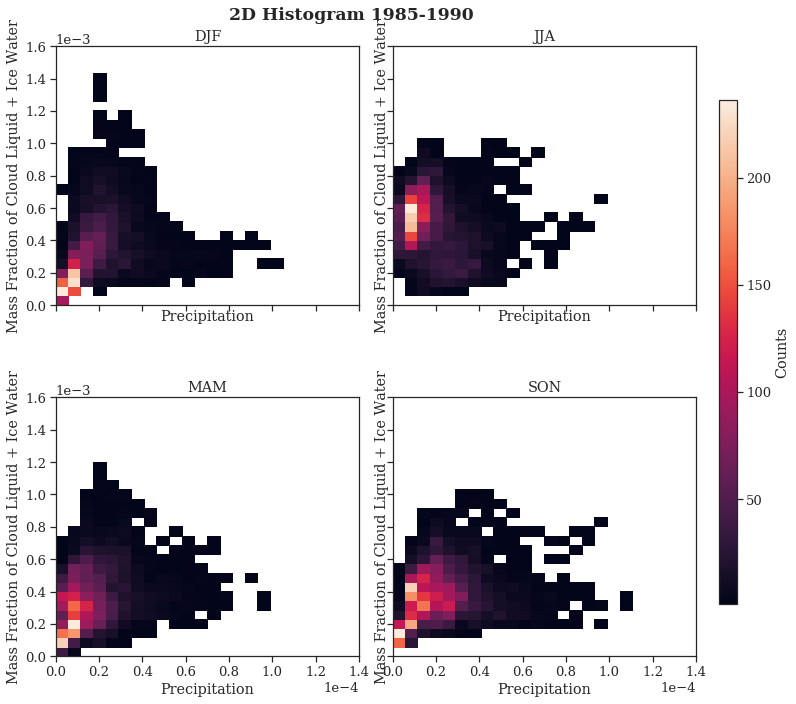

In [24]:
fct.plt_twodhist_season(_precip.sel(lat = slice(60,90), lon = slice(0,40)),
                        _cloud.sel(lat = slice(60,90), lon = slice(0,40)),
                        starty, endy,
                    bins = (12*2,14*2),
                    range = [[0, 1.4e-4], [0, 1.6e-3]], )

The values are generally quite small. 
Let's test for 30y (1985 -2014) and the Arctic.

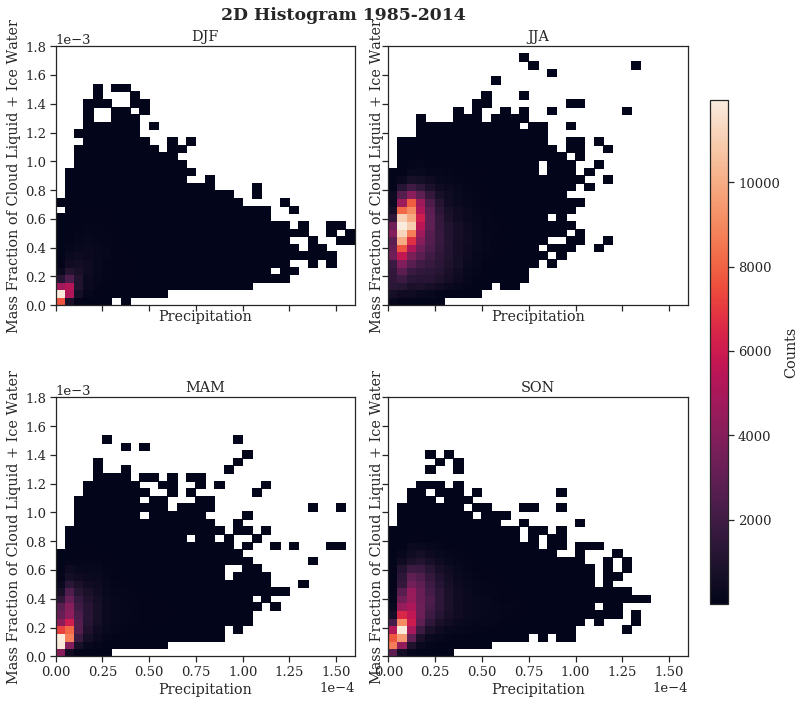

In [25]:
starty = '1985'; endy = '2014'  # Define time to test analysis

_cloud = (fn['clw'].clw.sel(
    time = slice(starty+'-01', endy+'-12')) + fn['cli'].cli.sel(
    time = slice(starty+'-01', endy+'-12'))).sum('lev', keep_attrs = True)
_cloud = _cloud.where(_cloud != 0.)
_cloud = _cloud.dropna('time', how = 'all')


_precip = fn['pr'].pr.sel(time = slice(starty+'-01', endy+'-12'))
_precip = _precip.where(_precip != 0.)
_precip = _precip.dropna('time', how = 'all')

fct.plt_twodhist_season(_precip.sel(lat = slice(60,90)),
                        _cloud.sel(lat = slice(60,90)),
                        starty, endy,
                    bins = (16*2,17*2),
                    range = [[0., 1.6e-4], [0, 1.8e-3]])

For the Arctic, it occurs most often that the precipitation is low and associated with low cloud content, seen for _DJF_, _MAM_, and _SON_. In _JJA_ the occurance is dominant for weak precipitation and high cloud content. 

How does the relations look for the entire season and for the globe? 

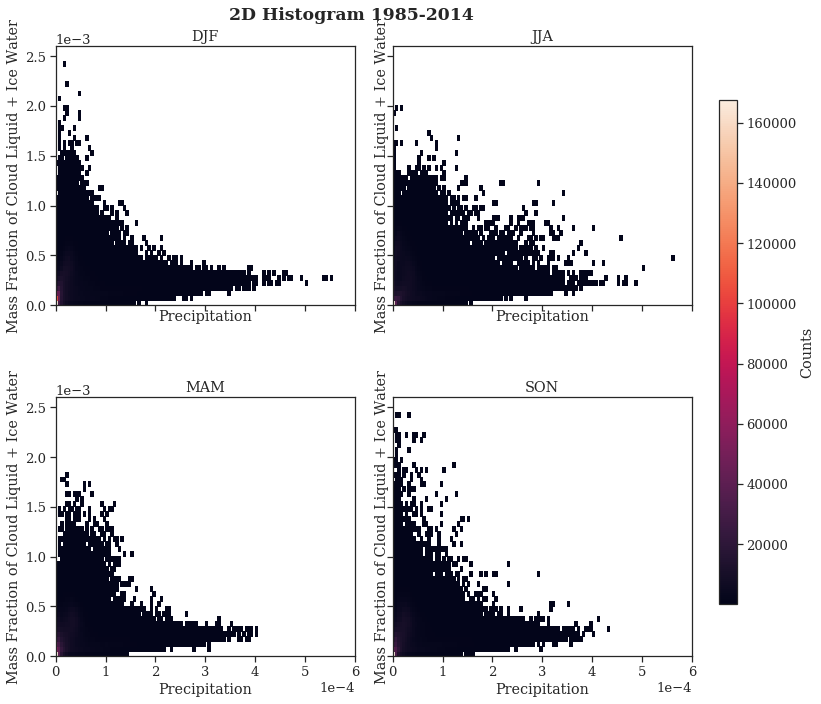

In [26]:
_cloud = (fn['clw'].clw.sel(
    time = slice(starty+'-01', endy+'-12')) + fn['cli'].cli.sel(
    time = slice(starty+'-01', endy+'-12'))).sum('lev', keep_attrs = True)
_cloud = _cloud.where(_cloud != 0.)
_cloud = _cloud.where(np.isnan)


_precip = fn['pr'].pr.sel(time = slice(starty+'-01', endy+'-12'))
_precip = _precip.where(_precip != 0.)
_precip = _precip.where(np.isnan)

fct.plt_twodhist_season(_precip, _cloud,starty, endy,
                        bins = (60*2,26*2),
                    range = [[0., 6e-4], [0, 2.6e-3]],)

The patterns for all season seem very similar. A 'triangle' in the lower left corner indicating that with more cloud content less precipitation occurs while with less cloud content the precipitation is higher. Unfortunately the most occurances are not seen as those are too close to zero. 
So it might help to make the colormap logarithmic.

In [27]:
_cloud = (fn['clw'].clw.sel(
    time = slice(starty+'-01', endy+'-12')) + fn['cli'].cli.sel(
    time = slice(starty+'-01', endy+'-12'))).sum('lev', keep_attrs = True)
_cloud = _cloud.where(_cloud != 0.)
_cloud = _cloud.where(np.isnan)


_precip = fn['pr'].pr.sel(time = slice(starty+'-01', endy+'-12'))
_precip = _precip.where(_precip != 0.)
_precip = _precip.where(np.isnan)

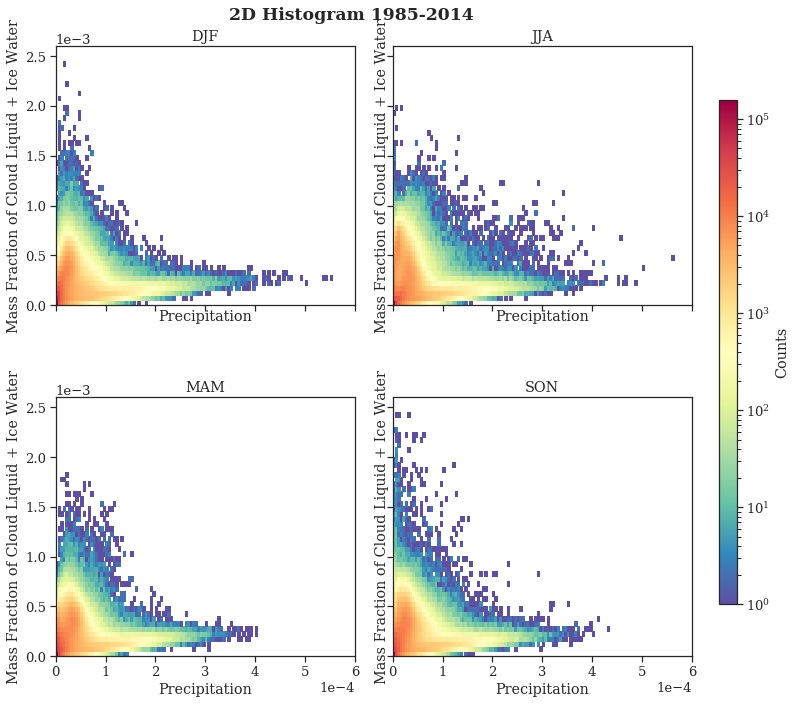

In [28]:
fct.plt_twodhist_season(_precip, _cloud, starty, endy,
                        bins = (60*2,26*2),
                    range = [[0., 6e-4], [0, 2.6e-3]],
                    norm = mpl.colors.LogNorm(),
                    cmap = plt.get_cmap('Spectral').reversed())

In all seasons we have more occurances for small precipitation amount related to small cloud content. The orange-ish colors seem like a hook. I don't know how to interpret it but it is very interesting!

Next: Include the temperature. Temperature is in pressure levels and _CLW, CLI_ are in model levels. Let's interpolate from model to pressure levels. 
https://nordicesmhub.github.io/GEO4962/06-vertical_interpolation/index.html

In [29]:
_rclw = np.empty(shape=(0, fn['clw'].clw.shape[2], fn['clw'].clw.shape[3]))
_rcli = np.empty(shape=(0, fn['cli'].cli.shape[2], fn['cli'].cli.shape[3]))

#for time in range(fn['clw'].time.shape[0]):
for time in range(12*5, 12*6):

#time = 0

    #  Extract the desired variables (need numpy arrays for vertical interpolation)
    hyam = fn['clw'].a.isel(time = time)         # hybrid A coefficients; The order must be top-to-bottom. 
    hybm = fn['clw'].b.isel(time = time)          # hybrid B coefficients; The order must be top-to-bottom. 
    psrf = fn['clw'].ps.isel(time = time)         # surface pressures in Pa
    p0   = 0.01*fn['clw'].p0.isel(time = time)    # scalar value equal to surface reference pressure in mb
    clw  = fn['clw'].clw.isel(time = time)        #TS(time,lev,lat,lon)
    cli  = fn['cli'].cli.isel(time = time)

    lats = fn['clw'].lat
    lons = fn['clw'].lon

  

  # Define the output pressure level.
    #pnew = [850.]
    pnew = 0.01*fn['ta'].plev
    #  Do the interpolation.
    intyp = 1                              # 1=linear, 2=log, 3=log-log
    kxtrp = False                          # True=extrapolate (when the output pressure level is outside of the range of psrf)

    # Vertical interpolation
    clw_new = Ngl.vinth2p(clw, hyam, hybm, pnew, psrf, intyp, p0, 1, kxtrp)
    clw_new[clw_new == 1e30] = np.nan

    cli_new = Ngl.vinth2p(cli, hyam, hybm, pnew, psrf, intyp, p0, 1, kxtrp)
    cli_new[cli_new == 1e30] = np.nan

    _rclw = np.vstack((_rclw, clw_new))
    _rcli = np.vstack((_rcli, cli_new))
#_rclw = _rclw.reshape(fn['ta'].ta.shape)
_rclw = _rclw.reshape((12,19,96,144))
_rcli = _rcli.reshape((12,19,96,144))

In [30]:
# Create new xarray Dataset
dset_p = xr.Dataset({'clwp':(('time', 'plev', 'lat', 'lon'), _rclw[:,:,:,:]),
                     'clip':(('time', 'plev', 'lat', 'lon'), _rcli[:,:,:,:]),
                     'ta': (('time', 'plev', 'lat', 'lon'), fn['ta'].ta.isel(time = slice(5*12, 6*12)))},
                    {#'time': fn['clw'].time, 
                        'time': fn['ta'].time.isel(time=slice(12*5, 12*6)),
                        'plev': fn['ta'].plev, 'lon': fn['ta'].lon, 'lat': fn['ta'].lat})

dset_p.clwp.attrs['units']         = clw.attrs['units']
dset_p.clwp.attrs['long_name']     = clw.attrs['long_name']
dset_p.clwp.attrs['standard_name'] = clw.attrs['standard_name']

In [31]:
dset_p

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, plev: 19, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-16T12:00:00 ... 1985-12-16T12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    clwp     (time, plev, lat, lon) float64 nan nan nan ... 0.0001449 0.0001447
    clip     (time, plev, lat, lon) float64 nan nan ... -2.394e-06 -2.397e-06
    ta       (time, plev, lat, lon) float32 263.81073 263.814 ... 221.0048

In [32]:
#(fn['pr'].pr*86400).sel(time.month = 1)

In [33]:
%reload_ext autoreload

In [34]:
!jupyter nbconvert --to html Data_Analysis_Diary.ipynb

[NbConvertApp] Converting notebook Data_Analysis_Diary.ipynb to html
[NbConvertApp] Writing 4068118 bytes to Data_Analysis_Diary.html


In [35]:
#!jupyter nbconvert --to html --template ./clean_output.tpl Data_Analysis_Diary.ipynb